In [ ]:
import numpy as np
import tensorflow as tensor
import pandas as pd

#data sets taken from https://www.kaggle.com/datasets/terminus7/pokemon-challenge?select=tests.csv
#pokemon data set was modified to remove unecessary attributes

pokemon = pd.read_csv("pokemon.csv")
combat = pd.read_csv("combats.csv")
test = pd.read_csv("tests.csv")

test1 = test
test2 = test

In [ ]:
pokemon.head()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,45,49,49,65,65,45
1,2,Ivysaur,60,62,63,80,80,60
2,3,Venusaur,80,82,83,100,100,80
3,4,Mega Venusaur,80,100,123,122,120,80
4,5,Charmander,39,52,43,60,50,65


In [ ]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
test.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [ ]:
win_count = combat.Winner.value_counts().sort_index()

win_count

1       37
2       46
3       89
4       70
5       55
      ... 
796     39
797    116
798     60
799     89
800     75
Name: Winner, Length: 783, dtype: int64

In [ ]:
win_count = combat.groupby('Winner').count()
win_count =win_count.drop('Second_pokemon',axis=1)

win_count

,First_pokemon
Winner,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [ ]:
win_count =win_count.rename(columns={"First_pokemon": "Win_Count"})
win_count

,Win_Count
Winner,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [ ]:
count_First = combat.groupby('Second_pokemon').count()
count_Second = combat.groupby('First_pokemon').count()

In [ ]:
count_First

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
...,...,...
796,56,56
797,67,67
798,59,59


In [ ]:
win_count['Total_Battles'] = count_First.Winner + count_Second.Winner

win_count


,Win_Count,Total_Battles
Winner,,
1,37,133
2,46,121
3,89,132
4,70,125
5,55,112
...,...,...
796,39,105
797,116,131
798,60,119


In [ ]:
win_count['Win_Percentage']= win_count['Win_Count']/win_count['Total_Battles']

win_count

,Win_Count,Total_Battles,Win_Percentage
Winner,,,
1,37,133,0.278195
2,46,121,0.380165
3,89,132,0.674242
4,70,125,0.560000
5,55,112,0.491071
...,...,...,...
796,39,105,0.371429
797,116,131,0.885496
798,60,119,0.504202


In [ ]:
win_percentage_column = win_count["Win_Percentage"]

In [ ]:
total = pd.merge(pokemon, win_percentage_column, how='left', left_on='#', right_index=True)
total = total.dropna(axis=0, how='any')


total

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_Percentage
0,1,Bulbasaur,45,49,49,65,65,45,0.278195
1,2,Ivysaur,60,62,63,80,80,60,0.380165
2,3,Venusaur,80,82,83,100,100,80,0.674242
3,4,Mega Venusaur,80,100,123,122,120,80,0.560000
4,5,Charmander,39,52,43,60,50,65,0.491071
...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,0.371429
796,797,Mega Diancie,50,160,110,160,110,110,0.885496
797,798,Hoopa Confined,80,110,60,150,130,70,0.504202
798,799,Hoopa Unbound,80,160,60,170,130,80,0.618056


In [ ]:
from sklearn.model_selection import train_test_split

X = total[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values
Y = total['Win_Percentage'].values

In [ ]:
X

array([[ 45,  49,  49,  65,  65,  45],
       [ 60,  62,  63,  80,  80,  60],
       [ 80,  82,  83, 100, 100,  80],
       ...,
       [ 80, 110,  60, 150, 130,  70],
       [ 80, 160,  60, 170, 130,  80],
       [ 80, 110, 120, 130,  90,  70]])

In [ ]:
Y

array([0.27819549, 0.38016529, 0.67424242, 0.56      , 0.49107143,
       0.54237288, 0.86466165, 0.85611511, 0.84444444, 0.16239316,
       0.41843972, 0.57638889, 0.14782609, 0.09774436, 0.625     ,
       0.23423423, 0.13076923, 0.625     , 0.96638655, 0.37301587,
       0.52892562, 0.86153846, 0.94444444, 0.48148148, 0.72142857,
       0.44927536, 0.83739837, 0.36641221, 0.576     , 0.68382353,
       0.8677686 , 0.53333333, 0.16806723, 0.38513514, 0.54098361,
       0.25      , 0.3984375 , 0.56428571, 0.15748031, 0.39837398,
       0.41085271, 0.81102362, 0.11538462, 0.37931034, 0.7578125 ,
       0.06293706, 0.21705426, 0.35483871, 0.0942029 , 0.19480519,
       0.22377622, 0.65714286, 0.53968254, 0.84375   , 0.65      ,
       0.85833333, 0.33098592, 0.68695652, 0.46610169, 0.45      ,
       0.79824561, 0.72      , 0.52307692, 0.32407407, 0.66923077,
       0.77142857, 0.78181818, 0.14      , 0.25806452, 0.43965517,
       0.21296296, 0.37190083, 0.50318471, 0.8034188 , 0.11851

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

def evaluate_model_performance(X_train, X_test, y_train, y_test, model_instance):
    model_instance.fit(X_train, y_train)
    training_score = model_instance.score(X_train, y_train)
    print("Training Score: " + str(training_score))

    predictions = model_instance.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print("MAE: " + str(mae))
    return mae


model_linear = LinearRegression()
model_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=0)
model_forest = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=20, random_state=0)

print("Linear Regression")
mae_linear = evaluate_model_performance(X_train, X_test, y_train, y_test, model_linear)

print("Decision Tree")
mae_tree = evaluate_model_performance(X_train, X_test, y_train, y_test, model_tree)

print("Random Forest")
mae_forest = evaluate_model_performance(X_train, X_test, y_train, y_test, model_forest)


Linear Regression
Training Score: 0.9007629690351246
MAE: 0.05660972356665265
Decision Tree
Training Score: 0.9780413167995309
MAE: 0.04893806908671235
Random Forest
Training Score: 0.9733119835594767
MAE: 0.04403744182112002


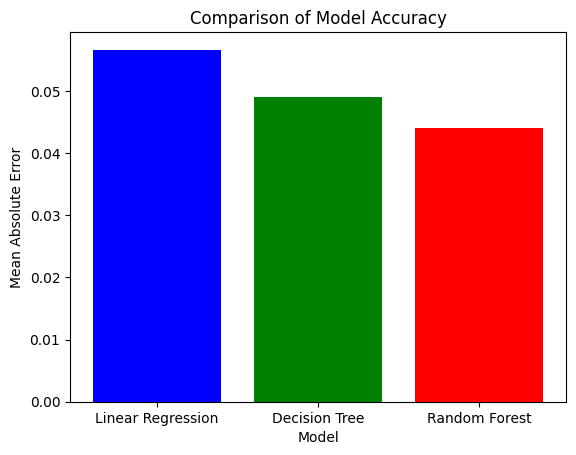

In [ ]:
import matplotlib.pyplot as plt

mae_values = [mae_linear, mae_tree, mae_forest]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.bar(model_names, mae_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Model Accuracy')
plt.show()


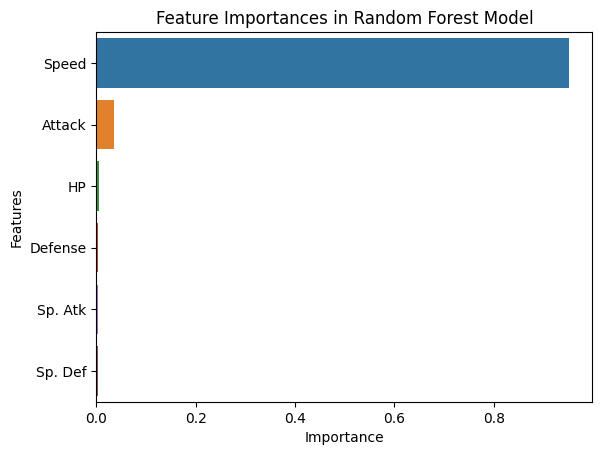

In [ ]:
importances = model_forest.feature_importances_
feature_names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

train = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test set Mean Absolute Error " + str(test_mae))

Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 0.3390 - mean_absolute_error: 0.4540 - val_loss: 0.0517 - val_mean_absolute_error: 0.1883
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 0.1638 - mean_absolute_error: 0.3069 - val_loss: 0.0312 - val_mean_absolute_error: 0.1508
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.1482 - mean_absolute_error: 0.2898 - val_loss: 0.0318 - val_mean_absolute_error: 0.1499
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 0.1139 - mean_absolute_error: 0.2728 - val_loss: 0.0303 - val_mean_absolute_error: 0.1430
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0999 - mean_absolute_error: 0.2464 - val_loss: 0.0277 - val_mean_absolute_error: 0.1373
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0883 - mean_absolute_error: 0.2349 - val_loss: 0.0275 - val_mean_absolute_error: 0.1372
Epoch 7/30
16/16 [=========

In [ ]:
test_merged_first = test.merge(pokemon, how='left', left_on='First_pokemon', right_on='#')

test_merged_second = test.merge(pokemon, how='left', left_on='Second_pokemon', right_on='#')

features_first = test_merged_first[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values
features_second = test_merged_second[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values

win_percentage_first = model_forest.predict(features_first)

win_percentage_second = model_forest.predict(features_second)

predicted_winners = np.where(win_percentage_first > win_percentage_second,
                             test['First_pokemon'],
                             test['Second_pokemon'])

test1['Predicted_Winner'] = predicted_winners

test1[['First_pokemon', 'Second_pokemon', 'Predicted_Winner']]


,First_pokemon,Second_pokemon,Predicted_Winner
0,129,117,129
1,660,211,660
2,706,115,706
3,195,618,618
4,27,656,27
...,...,...,...
9995,216,498,498
9996,113,404,404
9997,493,104,493
9998,643,259,643


In [ ]:
test_with_names = test.merge(pokemon[['#', 'Name']], how='left', left_on='First_pokemon', right_on='#')
test_with_names = test_with_names.rename(columns={'Name': 'First Pokémon'})
test_with_names = test_with_names.drop(['First_pokemon', '#'], axis=1)

test_with_names = test_with_names.merge(pokemon[['#', 'Name']], how='left', left_on='Second_pokemon', right_on='#')
test_with_names = test_with_names.rename(columns={'Name': 'Second Pokémon'})
test_with_names = test_with_names.drop(['Second_pokemon', '#'], axis=1)

test_with_names = test_with_names.merge(pokemon[['#', 'Name']], how='left', left_on='Predicted_Winner', right_on='#')
test_with_names = test_with_names.rename(columns={'Name': 'Predicted Winner'})
test_with_names = test_with_names.drop(['Predicted_Winner', '#'], axis=1)

test_with_names


,First Pokémon,Second Pokémon,Predicted Winner
0,Seaking,Lickitung,Seaking
1,Ferrothorn,Quagsire,Ferrothorn
2,Thundurus Therian Forme,Hitmonlee,Thundurus Therian Forme
3,Flaaffy,Maractus,Maractus
4,Spearow,Alomomola,Spearow
...,...,...,...
9995,Misdreavus,Lucario,Lucario
9996,Cubone,Gorebyss,Gorebyss
9997,Gabite,Onix,Gabite
9998,Swanna,Elekid,Swanna


In [ ]:
test_with_names.to_csv('test_with_names.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split

X_2 = total[['Speed']].values
Y_2 = total['Win_Percentage'].values

In [ ]:
X_2

array([[ 45],
       [ 60],
       [ 80],
       [ 80],
       [ 65],
       [ 80],
       [100],
       [100],
       [100],
       [ 43],
       [ 58],
       [ 78],
       [ 45],
       [ 30],
       [ 70],
       [ 50],
       [ 35],
       [ 75],
       [145],
       [ 56],
       [ 71],
       [101],
       [121],
       [ 72],
       [ 97],
       [ 70],
       [100],
       [ 55],
       [ 80],
       [ 90],
       [110],
       [ 65],
       [ 41],
       [ 56],
       [ 76],
       [ 50],
       [ 65],
       [ 85],
       [ 35],
       [ 60],
       [ 65],
       [100],
       [ 20],
       [ 55],
       [ 90],
       [ 30],
       [ 40],
       [ 50],
       [ 25],
       [ 30],
       [ 45],
       [ 90],
       [ 95],
       [120],
       [ 90],
       [115],
       [ 55],
       [ 85],
       [ 70],
       [ 60],
       [ 95],
       [ 90],
       [ 70],
       [ 90],
       [105],
       [120],
       [150],
       [ 35],
       [ 45],
       [ 55],
       [ 40],
      

In [ ]:
Y_2

array([0.27819549, 0.38016529, 0.67424242, 0.56      , 0.49107143,
       0.54237288, 0.86466165, 0.85611511, 0.84444444, 0.16239316,
       0.41843972, 0.57638889, 0.14782609, 0.09774436, 0.625     ,
       0.23423423, 0.13076923, 0.625     , 0.96638655, 0.37301587,
       0.52892562, 0.86153846, 0.94444444, 0.48148148, 0.72142857,
       0.44927536, 0.83739837, 0.36641221, 0.576     , 0.68382353,
       0.8677686 , 0.53333333, 0.16806723, 0.38513514, 0.54098361,
       0.25      , 0.3984375 , 0.56428571, 0.15748031, 0.39837398,
       0.41085271, 0.81102362, 0.11538462, 0.37931034, 0.7578125 ,
       0.06293706, 0.21705426, 0.35483871, 0.0942029 , 0.19480519,
       0.22377622, 0.65714286, 0.53968254, 0.84375   , 0.65      ,
       0.85833333, 0.33098592, 0.68695652, 0.46610169, 0.45      ,
       0.79824561, 0.72      , 0.52307692, 0.32407407, 0.66923077,
       0.77142857, 0.78181818, 0.14      , 0.25806452, 0.43965517,
       0.21296296, 0.37190083, 0.50318471, 0.8034188 , 0.11851

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=0)

def evaluate_model_performance(X_train, X_test, y_train, y_test, model_instance):
    model_instance.fit(X_train2, y_train2)
    training_score = model_instance.score(X_train2, y_train2)
    print("Training Score: " + str(training_score))

    predictions = model_instance.predict(X_test2)
    mae = mean_absolute_error(y_test2, predictions)
    print("MAE: " + str(mae))
    return mae


speed_model_forest = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=20, random_state=0)

print("Speed only Random Forest")
mae_forest2 = evaluate_model_performance(X_train, X_test, y_train, y_test, speed_model_forest)


Speed only Random Forest
Training Score: 0.9337694615559853
MAE: 0.05312034027674164


In [ ]:
speed_test_merged_first = test2.merge(pokemon, how='left', left_on='First_pokemon', right_on='#')

speed_test_merged_second = test2.merge(pokemon, how='left', left_on='Second_pokemon', right_on='#')

features_first = speed_test_merged_first[['Speed']].values
features_second = speed_test_merged_second[['Speed']].values

win_percentage_first_speed = speed_model_forest.predict(features_first)

win_percentage_second_speed = speed_model_forest.predict(features_second)

predicted_winners_speed_only = np.where(win_percentage_first_speed > win_percentage_second_speed,
                             test['First_pokemon'],
                             test['Second_pokemon'])

test2['Predicted_Winner_Speed'] = predicted_winners

test2[['First_pokemon', 'Second_pokemon', 'Predicted_Winner_Speed']].head()


,First_pokemon,Second_pokemon,Predicted_Winner_Speed
0,129,117,129
1,660,211,660
2,706,115,706
3,195,618,618
4,27,656,27


In [ ]:
speed_test_with_names = test2.merge(pokemon[['#', 'Name']], how='left', left_on='First_pokemon', right_on='#')
speed_test_with_names = speed_test_with_names.rename(columns={'Name': 'First Pokémon'})
speed_test_with_names = speed_test_with_names.drop(['First_pokemon', '#'], axis=1)

speed_test_with_names = speed_test_with_names.merge(pokemon[['#', 'Name']], how='left', left_on='Second_pokemon', right_on='#')
speed_test_with_names = speed_test_with_names.rename(columns={'Name': 'Second Pokémon'})
speed_test_with_names = speed_test_with_names.drop(['Second_pokemon', '#'], axis=1)

speed_test_with_names = speed_test_with_names.merge(pokemon[['#', 'Name']], how='left', left_on='Predicted_Winner_Speed', right_on='#')
speed_test_with_names = speed_test_with_names.rename(columns={'Name': 'Predicted Winner_Speed'})
speed_test_with_names = speed_test_with_names.drop(['Predicted_Winner'], axis=1)
speed_test_with_names = speed_test_with_names.drop(['Predicted_Winner_Speed', '#'], axis=1)

speed_test_with_names



,First Pokémon,Second Pokémon,Predicted Winner_Speed
0,Seaking,Lickitung,Seaking
1,Ferrothorn,Quagsire,Ferrothorn
2,Thundurus Therian Forme,Hitmonlee,Thundurus Therian Forme
3,Flaaffy,Maractus,Maractus
4,Spearow,Alomomola,Spearow
...,...,...,...
9995,Misdreavus,Lucario,Lucario
9996,Cubone,Gorebyss,Gorebyss
9997,Gabite,Onix,Gabite
9998,Swanna,Elekid,Swanna


In [ ]:
speed_test_with_names.to_csv('speed_test_with_names.csv', index=False)


In [ ]:
import numpy as np



mismatches = np.sum(predicted_winners != predicted_winners_speed_only)

print("Number of different winners:", mismatches)

NameError: name 'predicted_winners' is not defined